In [2]:
from core.gradient_descent import wolfe_conditions_search, point_number_terminate_condition, fixed_step_search
%load_ext autoreload
%autoreload 2

from core.high_order_optimization import *
from core.optimizer_evaluator import *
from core.utils import *
from core.visualizer import *
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
def evaluate_quasi_newton_methods_on_2dim(methods):
    print("—————— 2 Dimensions ——————")

    q = QuadraticForm(np.array([
        [10, 2],
        [2, 2]
    ]))
    roi = SearchRegion2d((-2, 2), (-2, 2))
    visualize_function_3d(q, roi)

    qg = q.gradient_function()

    for (name, get_approximator, get_initial_approximator) in methods:
        visualize_optimizing_process(q, roi, np.array(newton_optimize(
            q, qg, get_approximator(q, qg), np.array([1.5, -1.]), wolfe_conditions_search(0.1, 0.9), point_number_terminate_condition(10), get_initial_approximator(q, qg)
        )), 0).suptitle(name)

def evaluate_quasi_newton_methods_on_rosen(methods):
    print("—————— Many Dimensions Rosenbrock ——————")
    from scipy.optimize import rosen, rosen_der

    for (name, get_approximator, get_initial_approximator) in methods:
        for n in [2, 10, 50, 100]:
            f = rosen
            rg = rosen_der
            try:
                points = newton_optimize(f, rg, get_approximator(f, rg),
                                              # random_normalized_vector(n),  # Or just zero?
                                              np.zeros((n,)),
                                              wolfe_conditions_search(0.1, 0.9),
                                              # fibonacci_search(30),
                                              # fixed_step_search(1),
                                              precision_termination_condition,
                                              get_initial_approximator(f, rg)
                                              )
                print(f"Iterations until convergence for n={n}: {len(points)}")
            except Exception as e:
                print(f"At n={n}: Failed with {e}")

def evaluate_quasi_newton_methods_on_exp_parabola(methods):
    print("—————— Many Dimensions && complicated ——————")

    for (name, get_approximator, get_initial_approximator) in methods:

        for n in [2, 10, 50]:
            form = generate_positive_definite_quadratic_form(n, 10, random_orthonormal_basis)
            multipiled = lambda x: form(x) * np.exp(sum(c**2 for c in x))
            mg = symmetric_gradient_computer(multipiled)
            bfgs_points = newton_optimize(multipiled, mg, get_approximator(multipiled, mg), random_normalized_vector(form.n),
                                          wolfe_conditions_search(0.1, 0.9),
                                          # fibonacci_search(30),
                                          # fixed_step_search(1),
                                          precision_termination_condition,
                                          get_initial_approximator(multipiled, mg)
                                          )
            print(f"Iterations until convergence for n={n}: {len(bfgs_points)}")



    print("—————— Many Dimensions ——————")

    for n in [10, 100, 1000, 2000]:
        form = generate_positive_definite_quadratic_form(n, 1000, random_orthonormal_basis)
        fg = form.gradient_function()
        bfgs_points = newton_optimize(form, fg, get_approximator(form, fg), random_normalized_vector(form.n),
                                      wolfe_conditions_search(0.1, 0.9),
                                      # fibonacci_search(30),
                                      precision_termination_condition, get_initial_approximator(form, fg))
        print(f"Iterations until convergence for n={n}: {len(bfgs_points)}")

In [9]:
quasi_newton_methods = [
    ("Steepest descent", lambda f, g: GivenNewtonDirectionApproximator(lambda x: None), lambda f, g: none_approximation), # For comparison
    ("Newton", lambda f, g: GivenNewtonDirectionApproximator(lambda x: np.linalg.inv(f.hessian_function()(x))) if False and isinstance(f, QuadraticForm) else GivenNewtonDirectionApproximator.numerically_computing(f, g), lambda f, g: none_approximation),
    ("BFGS", lambda f, g: BFGSNewtonDirectionApproximator(), lambda f, g: none_approximation),
    ("L-BFGS[m=3]", lambda f, g: LBFGSNewtonDirectionApproximator(3), lambda f, g: none_approximation),
    ("L-BFGS[m=10]", lambda f, g: LBFGSNewtonDirectionApproximator(10), lambda f, g: none_approximation)
]

—————— 2 Dimensions ——————
[newton_optimize] Computed initial approximation
Best value found: x* = [-0.0078125 -0.0703125] with f(x*) = 0.0126953125
[newton_optimize] Computed initial approximation
Best value found: x* = [-1.30923418e-09  8.72822784e-10] with f(x*) = 1.4093662825922414e-17
[newton_optimize] Computed initial approximation
Best value found: x* = [ 3.96536283e-08 -2.98768726e-08] with f(x*) = 1.2770451775111171e-14
[newton_optimize] Computed initial approximation
Best value found: x* = [ 3.90219439e-08 -2.99232287e-08] with f(x*) = 1.2347270099277023e-14
[newton_optimize] Computed initial approximation
Best value found: x* = [ 3.90219439e-08 -2.99232286e-08] with f(x*) = 1.2347270099276946e-14


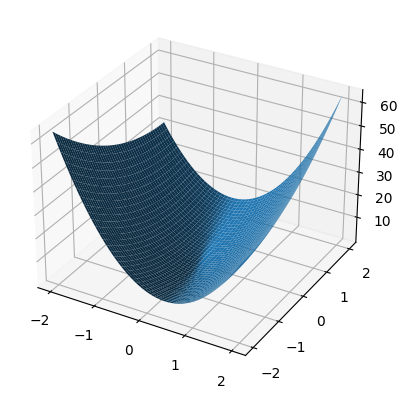

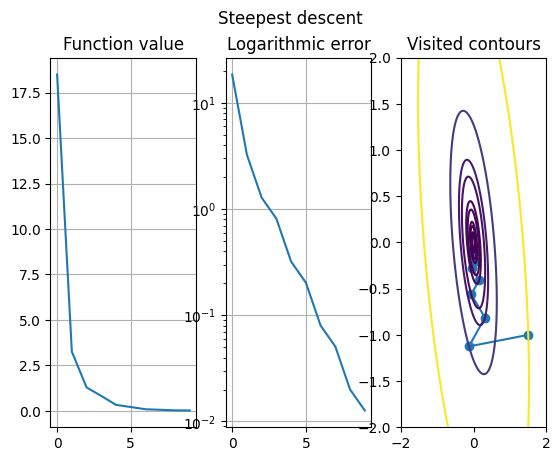

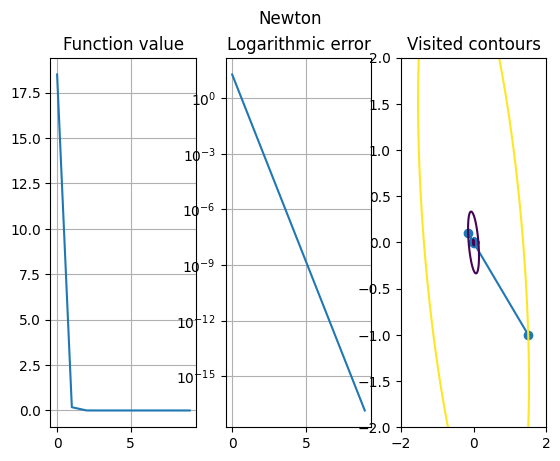

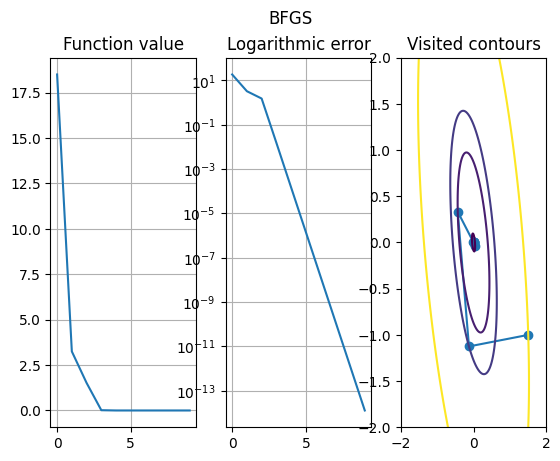

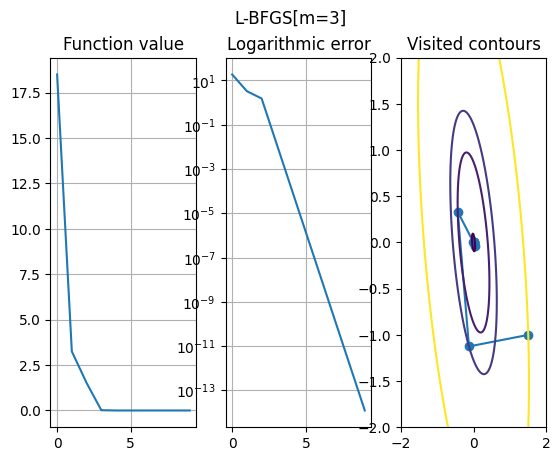

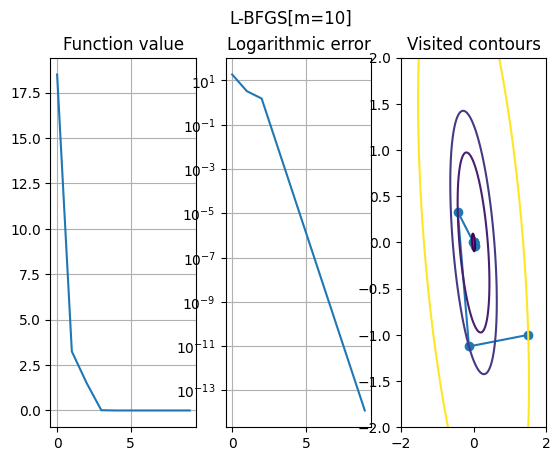

In [10]:
evaluate_quasi_newton_methods_on_2dim(quasi_newton_methods)

In [15]:
evaluate_quasi_newton_methods_on_rosen(quasi_newton_methods)

—————— Many Dimensions Rosenbrock ——————
[newton_optimize] Computed initial approximation
Iterations until convergence for n=2: 4164
[newton_optimize] Computed initial approximation
Iterations until convergence for n=10: 6782
[newton_optimize] Computed initial approximation
Iterations until convergence for n=50: 12656
[newton_optimize] Computed initial approximation
Iterations until convergence for n=100: 19758
[newton_optimize] Computed initial approximation
Iterations until convergence for n=2: 13
[newton_optimize] Computed initial approximation
Iterations until convergence for n=10: 24
[newton_optimize] Computed initial approximation
Iterations until convergence for n=50: 84
[newton_optimize] Computed initial approximation
Iterations until convergence for n=100: 158
[newton_optimize] Computed initial approximation
Iterations until convergence for n=2: 16
[newton_optimize] Computed initial approximation
Iterations until convergence for n=10: 56
[newton_optimize] Computed initial appr